<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B2%5DOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [6]:
X_train

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000
...,...,...,...
67,1,6.7,64000
192,1,4.8,73000
117,1,7.0,86000
47,1,7.6,78000


## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.6139545 , 0.57595081, 0.5653124 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z +=X[i]*parameters.T[i]
    return z

## Logistic Function

## $p =\frac{1}{1+e^{-Z}}$

In [12]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p =np.exp(z)/(1 + np.exp(z))   
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.7894536435880117

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma((y_ilog p(X_i))+(i-y_i)log(1-p(X_i)))$

In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss =-np.sum((y*np.log(p)+(1-y)*np.log(1-p)))
    return loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = (np.sum((y-y_hat)**2))/2
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0

    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss +=loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.2164738530369688

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=\Sigma(y_i-\theta^{T}X_i)X_{ik}$
## ${\partial\over{\partial \theta_j}}l(p)=\Sigma((y_i-p_i)X_{ij})$ 

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient =(y-y_hat)*X[j]
    else:
        p =logistic(X,parameters)
        gradient =(y-p) *X[j]
    return -gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09038623335256453

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model) #???
    
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[50.656484601359104, 11.346499448171967, 42.71347392442528]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]

    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 총 데이터 갯수와 총 batch의 갯수로 나눠 크기를 정하고, for문을 이용해 idx_list에 그 갯수 단위로 나누어 배치 안에서 들어갈 원래 데이터의 인덱스를 할당

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수


    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.6105774 , 0.57519438, 0.56246483])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  주어진 반복 횟수만큼 반복함
- num_epoch:반복 횟수
<br>

BGD: 학습 한 번에 모든 데이터셋에 대해 기울기를 구한다<br>
SGD: 학습 한 번에 임의의 데이터에 대해서만 기울기를 구한다<br>
MGD:학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구한다<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD
batch_size=k -> MGD
batch_size=whole -> BGD

In [25]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)

    loss_function_set = minus_log_cross_entropy_i if model == 'logistic' else mse_i  
   

    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)


    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,:]
            y_batch = y_train.iloc[idx]

            gradients = batch_gradient(X_batch,y_batch,parameters,model)
            parameters = step(parameters,gradients,learning_rate,batch_size)
            new_loss = batch_loss(X_batch,y_batch,parameters,loss_function_set,batch_size)
            
          #중단 조건
            if (abs(new_loss - loss) < tolerance):
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%10 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd = gradient_descent(X_train, y_train,tolerance=0.0001,learning_rate=0.03,batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.7889557561335965  params: [0.2055004  0.49389667 0.34639774]  gradients: [0.00794215646791486, 0.0014796841949678036, 0.007592035719542181]
epoch: 10  loss: 0.7508038463969031  params: [0.12866117 0.48098233 0.27286938]  gradients: [0.007472553179156797, 0.0011372238437588826, 0.007156120410398112]
epoch: 20  loss: 0.717306453166655  params: [0.05650702 0.47148318 0.20371781]  gradients: [0.0070060320268573355, 0.0007977309125394691, 0.006718496329453884]
epoch: 30  loss: 0.6880603487890575  params: [-0.01103169  0.46532484  0.13890619]  gradients: [0.006549542639471629, 0.0004692084011453098, 0.006288860252644196]
epoch: 40  loss: 0.6626123529832025  params: [-0.07408898  0.46235889  0.07830647]  gradients: [0.006109025126273928, 0.00015846634654519153, 0.005875732553582503]
epoch: 50  loss: 0.6404934819085202  params: [-0.13285091  0.46237798  0.02171533]  gradients: [0.005689045752756571, -0.0001294035646268975, 0.005485744953260573]
epoch: 60  loss: 0.621247826463

array([-1.07413714,  1.53651749, -1.4493421 ])

In [27]:
new_param_sgd = gradient_descent(X_train, y_train,model='logistic',batch_size=1,learning_rate=0.01,num_epoch=100)
new_param_sgd

epoch: 0  loss: 1.209076578247759  params: [0.32738684 0.53327362 0.33682388]  gradients: [0.007041614757412125, 0.003832053486063481, 0.004954414950564038]
epoch: 10  loss: 0.28607501573025157  params: [-0.96217732  1.18921818 -1.12288632]  gradients: [0.0024963035447543615, 0.0013584907766900018, 0.0017563760627856751]
epoch: 20  loss: 0.22520376425437483  params: [-1.14525539  1.8051963  -1.7242547 ]  gradients: [0.00202230246588611, 0.0011005389362029937, 0.0014228732920957014]
epoch: 30  loss: 0.19317237325674452  params: [-1.259278    2.22238775 -2.12649101]  gradients: [0.0017611739810395796, 0.0009584325649884493, 0.0012391457077401424]
epoch: 40  loss: 0.17188994292655302  params: [-1.34724604  2.53033027 -2.42113367]  gradients: [0.0015830561425681487, 0.0008615006669282681, 0.001113823645644072]
epoch: 50  loss: 0.1566792078709699  params: [-1.41774935  2.77004103 -2.6491284 ]  gradients: [0.0014534481096938375, 0.0007909678514721206, 0.0010226326336521476]
epoch: 60  loss: 

array([-1.62643373,  3.4589472 , -3.29775225])

In [28]:
new_param_mgd = gradient_descent(X_train, y_train, tolerance=0.00001,batch_size=20, learning_rate=0.005)
new_param_mgd

epoch: 0  loss: 0.5407989462641625  params: [0.73968116 0.54219055 0.27430011]  gradients: [0.0007803989092934484, 0.0008946742516384953, 0.0012485159238316019]
epoch: 10  loss: 0.4981692744521261  params: [0.60308788 0.53202522 0.19055053]  gradients: [0.0007212344793348868, 0.0008293290254336154, 0.0011836929782021188]
epoch: 20  loss: 0.46123941735269575  params: [0.47579072 0.52476971 0.11133424]  gradients: [0.0006590838310858836, 0.0007604397478824564, 0.0011156036640499508]
epoch: 30  loss: 0.429806999974738  params: [0.35780987 0.5207709  0.03705029]  gradients: [0.0005957300968159206, 0.0006902058701228185, 0.0010465096821390826]
epoch: 40  loss: 0.4034550153484412  params: [ 0.24898638  0.52018916 -0.03212292]  gradients: [0.0005329744865997197, 0.0006208673579689957, 0.000978651232867915]
epoch: 50  loss: 0.3816184565780065  params: [ 0.14899489  0.52300339 -0.09622378]  gradients: [0.0004723901169293921, 0.0005543791212167051, 0.0009139296289809509]
epoch: 60  loss: 0.36366

array([-0.52577334,  0.69960392, -0.56883988])

### Predict Label

In [29]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 7,  3]])

In [32]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.82


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [33]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [34]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [35]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.70248902, 2.33584725])

In [36]:
#경사하강법
new_param = gradient_descent(X, y,model="linear")
new_param

epoch: 0  loss: 0.20491919352484342  params: [1.02603685 0.81430297]  gradients: [-0.03022111683065594, -0.02549747090428872]
epoch: 10  loss: 0.06040508288704041  params: [1.06050895 1.60123398]  gradients: [-0.011032146484742277, -0.011017519275860818]
epoch: 20  loss: 0.04527287726303129  params: [0.89229927 1.9322449 ]  gradients: [-0.010171332318745622, -0.009066169673177407]
epoch: 30  loss: 0.03915981255570532  params: [0.80134374 2.11122956]  gradients: [-0.009705910077772965, -0.008011055370125293]
epoch: 40  loss: 0.03645931711465966  params: [0.75216204 2.20801059]  gradients: [-0.009454245808288513, -0.0074405313447369024]
epoch: 50  loss: 0.035175981908658366  params: [0.72556839 2.26034227]  gradients: [-0.009318165279683576, -0.007132036177283384]
epoch: 60  loss: 0.03453377101858252  params: [0.7111886  2.28863918]  gradients: [-0.009244583478407842, -0.006965225904433953]
epoch: 70  loss: 0.034201634299929104  params: [0.70341313 2.30393996]  gradients: [-0.00920479614

array([0.69425881, 2.32195407])

In [37]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

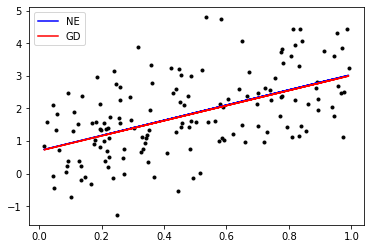

In [38]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()